In [7]:
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import load_model


In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
#load the data

testing_set = pd.read_csv('fashion-mnist_test.csv')

In [8]:
#Preprocess the data 
# Reshape the given csv into the original test images

X_test = np.array(testing_set.iloc[:,1:])
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
X_test = X_test/255
y_test = to_categorical(np.array(testing_set.iloc[:,0]))

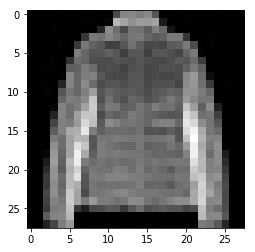

In [29]:
# Show one image to predict
    
plt.imshow(np.squeeze(X_test[42]), cmap='gray')
plt.show()

In [31]:
# Load the model

model = load_model('best_cnn.h5')


In [42]:
# Make predictions for one image
image = X_test[42].reshape(1,28,28,1)
prediction = model.predict_classes(image,batch_size=150)  
print(prediction)
actual_value = y_test[42]
print(np.where(actual_value==1))


[4]
(array([4], dtype=int64),)


In [35]:
# Make predictions for all the test images and save them to a csv file
predictions = model.predict_classes(X_test,batch_size=150) 
filename = 'demo_classification.csv';
PictureID = list(range(1,len(predictions)+1))
submission = pd.DataFrame({'Clothe_category':predictions })
submission.to_csv(filename,header = True, index = False)
print('Saved file: ' + filename)

Saved file: demo_classification.csv


In [36]:
# Data Model visualization
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)          102464    
__________